In [152]:
'''
Comparing Average Daily Temperatures: Chapel Hill vs San Francisco
How does average daily temperature compare over the last 3 full years? 
'''
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import datetime
import os

In [153]:
os.chdir('C:\Users\Steven\OneDrive\Python Resources\Weather Data')
conn = sqlite3.connect('weather.db')
c = conn.cursor()
c.execute(''' SELECT Date, Temp, Key FROM historical_weather2 
WHERE (Key = 'KIGX' OR Key = 'KSFO') 
AND (Date >= '2015-01-01') ''')
dat = c.fetchall()
df = pd.DataFrame(dat,columns=['Date','Temp','Key'])

df = df.ix[df['Temp']!=999,:].reset_index()
df['Year'] = 0

In [154]:
#get a column with just the years
for i in range(len(df)):
    df.ix[i,'Year'] = df.ix[i,'Date'][:4]

In [155]:
#create separate df for the two different keys
ksfo = df.ix[df['Key']=='KSFO',['Date','Temp','Year']]
kigx = df.ix[df['Key']=='KIGX',['Date','Temp','Year']]
  
#get the mean temp over each day for each city
ksfo = ksfo[['Date','Temp']].groupby('Date').mean()
ksfo = pd.DataFrame(ksfo.reset_index())

kigx = kigx[['Date','Temp']].groupby('Date').mean()
kigx = pd.DataFrame(kigx.reset_index())

#order the dates 
pd.to_datetime(kigx.Date).order().index
kigx = kigx.ix[pd.to_datetime(kigx.Date).order().index]
kigx = kigx.reset_index()

pd.to_datetime(ksfo.Date).order().index
ksfo = ksfo.ix[pd.to_datetime(ksfo.Date).order().index]
ksfo = ksfo.reset_index()

C:\Users\Steven\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: order is deprecated, use sort_values(...)
C:\Users\Steven\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: order is deprecated, use sort_values(...)
C:\Users\Steven\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: order is deprecated, use sort_values(...)
C:\Users\Steven\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: order is deprecated, use sort_values(...)


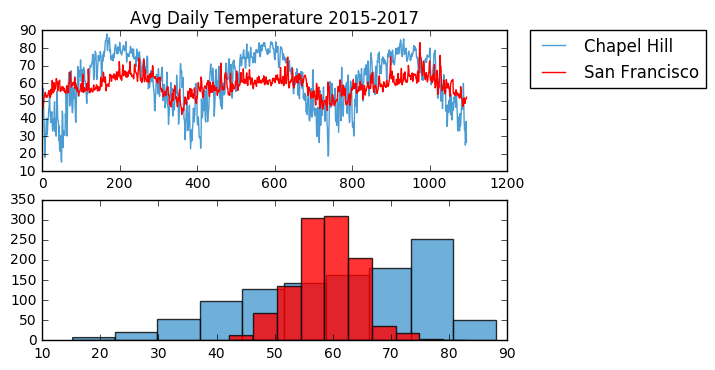

In [156]:
#Want to plot the overlapping temperatures but for each year in separate panels

rng = pd.date_range('1/1/2015', periods=len(kigx), freq='D')

plt.figure(1)
plt.subplot(211)
plt.plot(kigx['Temp'],label='Chapel Hill',color=(0.29411,0.61176,0.82745))
plt.plot(ksfo['Temp'],label='San Francisco',color='r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Avg Daily Temperature 2015-2017')
 
plt.subplot(212)
plt.hist(kigx['Temp'], color=(0.29411,0.61176,0.82745),alpha=.8)
plt.hist(ksfo['Temp'],color = 'r',alpha=.8)

plt.show()